Welcome to Lab 5! 

In class, we learned about Principal Components Analysis (PCA). Now let's learn about Sparse Principal Components Analysis (Sparse PCA). 

References to read:
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html
* Section 14.5.5 Sparse Principal Components in ESL

Q1: What is Sparse PCA? When would one prefer to use Sparse PCA over ordinary PCA, and vice versa?

SparsePCA is a variant of PCA, with the goal of extracting the set of sparse components that best reconstruct the data.

PCA has the disadvantage that the components extracted by this method have exclusively dense expressions, i.e. they have non-zero coefficients when expressed as linear combinations of the original variables. This can make interpretation difficult when the data is high-dimensional. In some cases, the real underlying components can be more naturally imagined as sparse vectors. Sparse PCA yields a more parsimonious representation, which can often be more interpretable in high-dimensional settings.

On the other hand, Sparse PCA does not necessarily produce principal components (PCs) that are orthogonal. So we need to be careful when interpretting the learned PC loadings and scores.

Q2: What is the optimization problem that sparse PCA in `sklearn` tries to solve? Why does it result in sparse solutions?

Let $X$ be a $n\times p$ matrix. Assuming we want to reduce the data down to $m$ dimensions, the optimization problem is
\begin{align}
\min_{U,V} &\| X - UV\|^2_2 + \alpha \|V\|_1\\
\text{s.t. } & \|U_k\|_2 \le 1 \quad \forall k = 1,\cdots, m
\end{align}
where $U \in \mathbb{R}^{n\times m}$ and $V \in \mathbb{R}^{m\times p}$.

Q3: What are the hyperparameters for sparse PCA? What do they control? How does changing their value affect the results from sparse PCA?

The hyperparmeter is $\alpha$. Large values of $\alpha$ make more sparse components.

Q4: How would you select the hyperparameters in practice?

Cross-validation is an option, or you can use other methods like Bayesian Information Criterion (BIC).

Q5: What is Mini-Batch Sparse PCA? How is it different from Sparse PCA?

Mini-batch sparse PCA is a variant of SparsePCA that groups together data into smaller batches (mini batches) during the optimization procedure (like minibatch stochastic gradient descent). In particular, it iterates over small chunks of the set of features, for a given number of iterations. The tradeoff is that minibatch sparse PCA may be less accurate.

Q6: Load and preprocess the Olivetti faces dataset using the following code.

In [1]:
import logging

import matplotlib.pyplot as plt
from numpy.random import RandomState

from sklearn import cluster, decomposition
from sklearn.datasets import fetch_olivetti_faces

rng = RandomState(0)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

# Global centering (focus on one feature, centering all samples)
faces_centered = faces - faces.mean(axis=0)

# Local centering (focus on one sample, centering all features)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 400 faces


Q7: Plot the faces using the following function.

In [2]:
from matplotlib import pyplot as plt
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()


Q8: Apply sparse PCA and mini-batch sparse PCA to this data. How do the results compare? How does the speed compare?

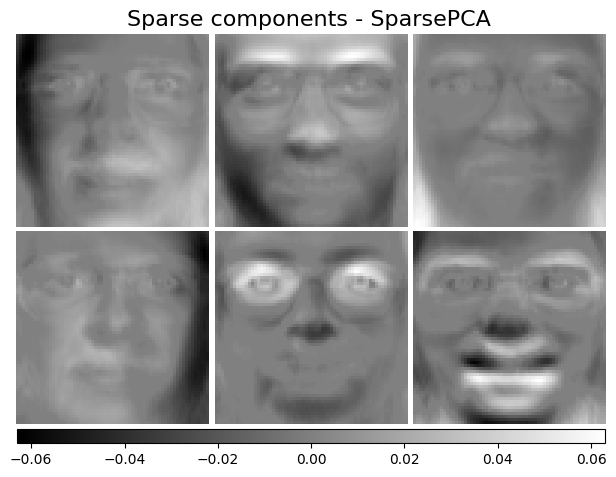

In [3]:
from sklearn import decomposition
batch_pca_estimator = decomposition.SparsePCA(
    n_components=n_components, alpha=0.1, max_iter=100
)
batch_pca_estimator.fit(faces_centered)
plot_gallery(
    "Sparse components - SparsePCA",
    batch_pca_estimator.components_[:n_components],
)

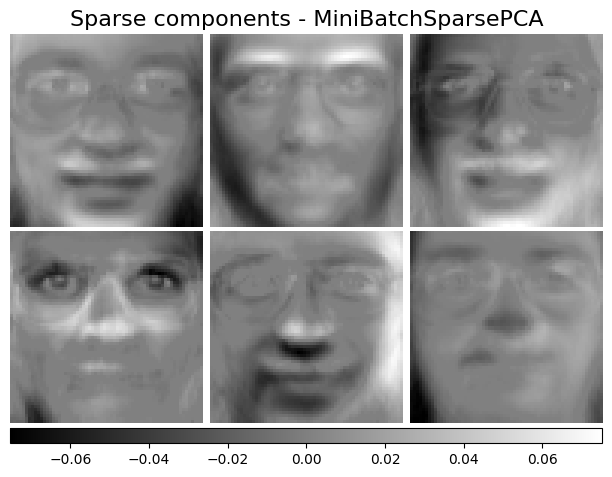

In [4]:
batch_pca_estimator = decomposition.MiniBatchSparsePCA(
    n_components=n_components, alpha=0.1, max_iter=100, batch_size=3
)
batch_pca_estimator.fit(faces_centered)
plot_gallery(
    "Sparse components - MiniBatchSparsePCA",
    batch_pca_estimator.components_[:n_components],
)